In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import torch
print(torch.cuda.is_available())

True


In [6]:
np.random.seed(42)
dataset_path = Path("datasets/two_new_new")
test_path = Path("test/two_new_new")
dataset_path, test_path

(PosixPath('datasets/two_new_new'), PosixPath('test/two_new_new'))

In [3]:
src_without_transform = (ImageList.from_folder(dataset_path)
                        .split_by_rand_pct(0.2)         #How to split in train/valid? -> use the folders
                        .label_from_folder()            #How to label? -> depending on the folder of the filenames
                        )

In [4]:
vehicle_transforms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.2)

In [5]:

data = (src_without_transform
        .transform(vehicle_transforms,size=128)
        .databunch(bs=8))
"""
data = (src_without_transform
        .transform(vehicle_transforms,size=256)
        .databunch(bs=16))

data = (src_without_transform
        .transform(vehicle_transforms,size=512)
        .databunch(bs=4))"""

'\ndata = (src_without_transform\n        .transform(vehicle_transforms,size=256)\n        .databunch(bs=16))\n\ndata = (src_without_transform\n        .transform(vehicle_transforms,size=512)\n        .databunch(bs=4))'

In [6]:
data.classes

['Aprilia SR 150',
 'Hero Dare',
 'Hero Maestro Edge',
 'Honda Activa 5G',
 'Honda CLIQ',
 'Honda Dio',
 'Okinawa Praise',
 'TVS Jupiter',
 'TVS NTORQ 125',
 'TVS Scooty Pep Plus',
 'TVS XL 100',
 'Vespa SXL 150',
 'Yamaha Fascino',
 'Yamaha Ray ZR']

In [7]:
learn = unet_learner(data, models.resnet50, metrics=[error_rate,accuracy])

In [32]:
learn.load("stage256")

Learner(data=ImageDataBunch;

Train: LabelList (1076 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
TVS XL 100,TVS XL 100,TVS XL 100,TVS XL 100,TVS XL 100
Path: datasets/two_new_new;

Valid: LabelList (269 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
Honda Activa 5G,Okinawa Praise,Honda CLIQ,Okinawa Praise,Okinawa Praise
Path: datasets/two_new_new;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (

In [23]:
learn.unfreeze()

In [8]:
learn.lr_find()
learn.recorder.plot(), learn.recorder.plot_lr()

epoch,train_loss,valid_loss,error_rate,accuracy,time


RuntimeError: CUDA out of memory. Tried to allocate 288.00 MiB (GPU 0; 3.95 GiB total capacity; 3.07 GiB already allocated; 73.50 MiB free; 97.48 MiB cached)

In [30]:
learn.fit_one_cycle(4,max_lr=slice(8e-5,8e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.508009,1.146596,0.293680,0.706320,03:31
1,0.930941,1.142581,0.308550,0.691450,03:26
2,0.671229,0.747132,0.230483,0.769517,03:27
3,0.431949,0.625981,0.185874,0.814126,03:25


In [ ]:
learn.recorder.plot_losses()

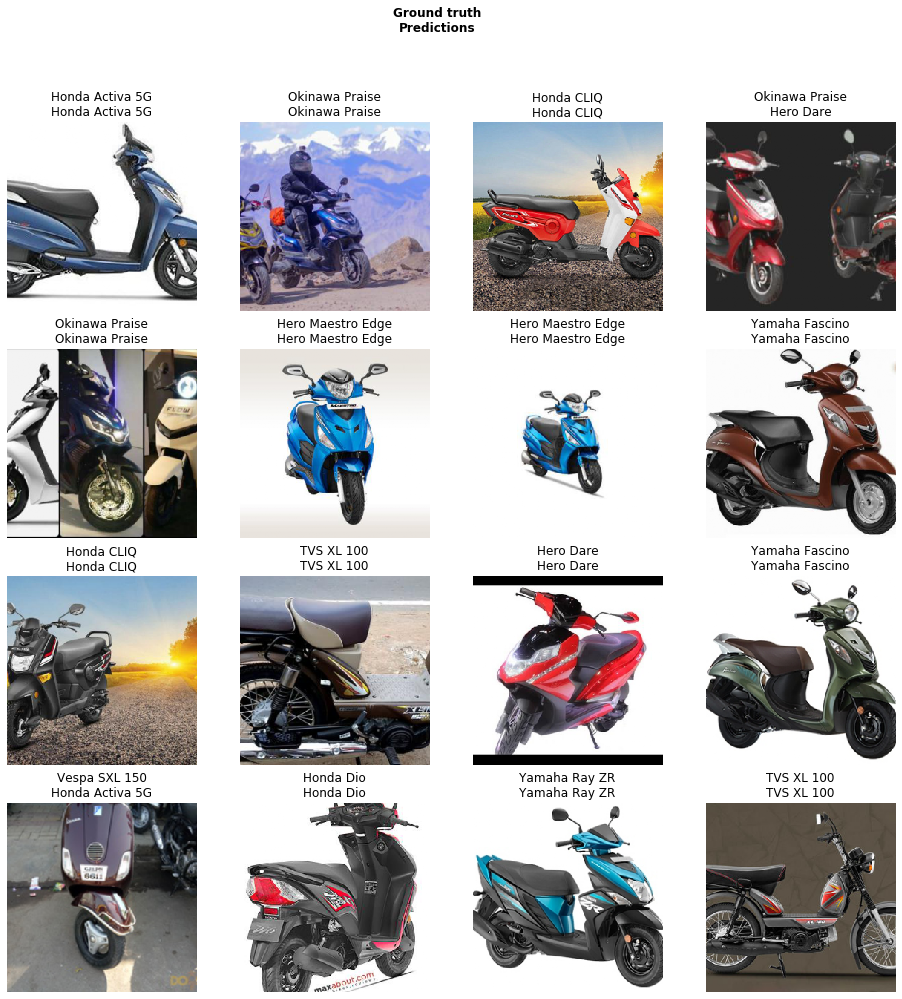

In [25]:
learn.show_results(ds_type=DatasetType.Valid)

In [5]:
learn.export()

NameError: name 'learn' is not defined

In [4]:
??load_learner

In [7]:
model = load_learner(dataset_path)

In [26]:
doc(open_image)

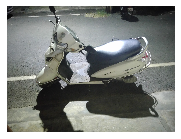

In [8]:
img = open_image(test_path/'test3.jpg')
img.show()


In [14]:
doc(model.predict)

In [25]:
pred_class,pred_idx,outputs = model.predict(img)
mapped=sorted(set(zip(outputs, model.data.classes)),reverse=True)
pred_class, mapped

(Category Vespa SXL 150,
 [(tensor(0.8092), 'Vespa SXL 150'),
  (tensor(0.1369), 'TVS Jupiter'),
  (tensor(0.0351), 'Honda Activa 5G'),
  (tensor(0.0146), 'TVS Scooty Pep Plus'),
  (tensor(0.0016), 'Yamaha Fascino'),
  (tensor(0.0009), 'TVS NTORQ 125'),
  (tensor(0.0006), 'Honda Dio'),
  (tensor(0.0004), 'Hero Maestro Edge'),
  (tensor(0.0003), 'Honda CLIQ'),
  (tensor(0.0001), 'Yamaha Ray ZR'),
  (tensor(5.6172e-05), 'Hero Dare'),
  (tensor(4.4761e-05), 'TVS XL 100'),
  (tensor(4.1914e-05), 'Okinawa Praise'),
  (tensor(7.2538e-06), 'Aprilia SR 150')])